## WeRateDogs - Query Twitter Data
<ul>
<li><a href="#intro">I. - Introduction</a></li>
<li><a href="#gathering">II. - Data Gathering</a></li>
<li><a href="#wrangling">III. - Data Wrangling</a></li>
<li><a href="#eda">IV. - Explanatory Analysis</a></li>
<li><a href="#conclusions">V. - Conclusions</a></li>
<li><a href="#references">VI. - References</a></li>
<li><a href="#appendix">VII. - Appendix</a></li>
</ul>

<a id='intro'></a>
## I. - Introduction

During the course of my Udacity "Data Analyst" Nanodegree I analysed Tweets from [WeRateDogs®](https://twitter.com/dog_rates?lang=eng). WeRateDogs® shows off dog picutes in all variations and consider itself as the only source for professional dog ratings. As of March 2020, over 8,7 Mio. twitter accounts follow the supplier of cute doggo pictures.

This report aims to answer simple and important questions of online marketing: 
##### 1. When is the best time for a tweet?
To be precise, we want to analyze if tweets tweeted during the weekend are more popular than tweets during workdays. The same analysis will be done for hours. Since "popularity" is barely quantifiable # of retweets and # of favorites is used instead.
##### 3. What is the best medium for a tweet?
Is there a diffrence between tweeting via smartphone compared to tweeting via pc? Should a good tweet contain or quote or s it better to tweet replies?

<a id='gathering'></a>
## II. - Data Gathering

##### II. A.) Importing Packages
The most important packages were imported including Pandas, Numpy and Matplotlib. In addition, the packages Tweepy, Requests and JSON are needed to query data from twitter. Datetime, Random and Image are optional for the project itself.

In [380]:
from IPython.display import Image

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import datetime
import random

import tweepy
import requests
import json

##### II. B.) Loading and Inspecting CSV Data
Afterwards, the CSV was loaded into the notebook and I had a first look at the data.

In [2]:
df = pd.read_csv('twitter-archive-enhanced.csv', index_col=['tweet_id'], parse_dates=['timestamp','retweeted_status_timestamp'])

In [3]:
df.head()

,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
tweet_id,,,,,,,,,,,,,,,,
892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


Some column names aren't intuitive. Hence, we check their meanings according to the [data dictionary](https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/tweet-object).

The key takeaways are:

- in_reply_to_status_id and in_reply_to_user_id are filled when the twee was a reply to another tweet.
- retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp represents the original tweet data in case of a retweet.
- doggo, floofer, pupper and puppo dont exist in the original tweet object. However, doggo is slang-term for dog. Similarly, pupper and puppo are slang-terms for puppies and floofers are very very old dogs.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 892420643555336193 to 666020888022790149
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   in_reply_to_status_id       78 non-null     float64            
 1   in_reply_to_user_id         78 non-null     float64            
 2   timestamp                   2356 non-null   datetime64[ns, UTC]
 3   source                      2356 non-null   object             
 4   text                        2356 non-null   object             
 5   retweeted_status_id         181 non-null    float64            
 6   retweeted_status_user_id    181 non-null    float64            
 7   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 8   expanded_urls               2297 non-null   object             
 9   rating_numerator            2356 non-null   int64              
 10  rating_denominator          2

As can be seen, in_reply_to_status_id and in_reply_to_user_id contain mostly missings. However, this makes sence, since WeRateDogs® tweets new picutres instead of replies. The same is true for retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp. In addition to that, there are some missing URLS's.

In [5]:
df[df['expanded_urls'].isna()]
df[(df['expanded_urls'].isna())&(df['in_reply_to_status_id'].isna())]
df[(df['expanded_urls'].isna())&(df['in_reply_to_status_id'].isna())&(df['retweeted_status_id'].isna())]

,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
tweet_id,,,,,,,,,,,,,,,,
828361771580813312,NaN,NaN,2017-02-05 21:56:51+00:00,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Beebop and Doobert should start a band 12/10 w...,NaN,NaN,NaT,NaN,12,10,None,None,None,None,None
785515384317313025,NaN,NaN,2016-10-10 16:20:36+00:00,"<a href=""http://twitter.com/download/iphone"" r...","Today, 10/10, should be National Dog Rates Day",NaN,NaN,NaT,NaN,10,10,None,None,None,None,None
696518437233913856,NaN,NaN,2016-02-08 02:18:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Oh my god 10/10 for every little hot dog pupper,NaN,NaN,NaT,NaN,10,10,None,None,None,pupper,None


A quick check revealed, that missing URLs are mostly replies or retweets. In the end, only 3 tweets have a missing URL and are neither replies or retweets.

Lets continue with the columns doggo, floofer, pupper and puppo.

In [6]:
columns = ['doggo','floofer','pupper','puppo']

for x in columns:
    print(str(x.capitalize())+': '+str(len(df[(df[x] != 'None')&(df[x] != str(x))])))

Doggo: 0
Floofer: 0
Pupper: 0
Puppo: 0


These columns are not mentioned in the tweet object data dictionary, hence values were checked. Surprisingly, these columns are filled with "None" or the respective column name, which seems odd given our current knowledge of the data.

##### II. C.) Query Twitter Data

In the next steps, twitter API was used to gather additional information about each of the given tweets. Therefore Tweepy was used to gather tweet data and write each tweets data into a JSON-file. The correct tweets are identified by their respective tweet id.

In [7]:
?tw.API

Object `tw.API` not found.


In [8]:
access_token = 'qqq'
access_secret = 'qqq'
account_key = 'qqq'
account_secret = 'qqq'

auth = tweepy.OAuthHandler(account_key, account_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

try:
    api.verify_credentials()
    print("Authentication successful")
except:
    print("Authentication error")

Authentication successful


In [9]:
id_list = list(df.index)

In [10]:
?api.get_status

In the next code cell, tweet data is gathered by Tweepy. In case of an error, the respective tweet id and the error message is written into an CSV. In addition, datetime package was used to measure runtime of the code cell.

In [11]:
start_date = datetime.datetime.today()

tweet_data = []
tweep_errors = []

for x in id_list:    
    try:
        tweet_data.append(api.get_status(x, tweet_mode='extended')._json)
    except tweepy.TweepError as error:
        print('Unable to query:', str(x))
        tweep_errors.append({'id':x, 'error':error})
        
print('Summary: '+str(len(tweep_errors))+' Missing Tweets ('+str(round(len(tweep_errors)/len(tweet_data),2))+'%)')

with open('tweet_json.txt', 'w') as x:
    json.dump(tweet_data, x)
    
pd.DataFrame(tweep_errors).to_csv('tweet_errors.csv', index=False)
    
print(str('Duration: '+str(datetime.datetime.today() - start_date)))

Unable to query: 888202515573088257
Unable to query: 873697596434513921
Unable to query: 872668790621863937
Unable to query: 872261713294495745
Unable to query: 869988702071779329
Unable to query: 866816280283807744
Unable to query: 861769973181624320
Unable to query: 856602993587888130
Unable to query: 851953902622658560
Unable to query: 845459076796616705
Unable to query: 844704788403113984
Unable to query: 842892208864923648
Unable to query: 837366284874571778
Unable to query: 837012587749474308
Unable to query: 829374341691346946
Unable to query: 827228250799742977
Unable to query: 812747805718642688
Unable to query: 802247111496568832
Unable to query: 779123168116150273
Unable to query: 775096608509886464
Unable to query: 771004394259247104
Unable to query: 770743923962707968
Unable to query: 759566828574212096


Rate limit reached. Sleeping for: 349


Unable to query: 754011816964026368
Unable to query: 680055455951884288


Rate limit reached. Sleeping for: 340


Summary: 25 Missing Tweets (0.01%)
Duration: 0:35:53.506706


Since tweet data as well as error data is written into seperate files, there is no need to run this code cell more than once. In the next steps we simply import these files.

Unfortunately, here are 25 tweets missing, which needs further investigation.

In [280]:
df_errors = pd.read_csv('tweet_errors.csv')
df_errors

,id,error
0,888202515573088257,"[{'code': 144, 'message': 'No status found wit..."
1,873697596434513921,"[{'code': 144, 'message': 'No status found wit..."
2,872668790621863937,"[{'code': 144, 'message': 'No status found wit..."
3,872261713294495745,"[{'code': 144, 'message': 'No status found wit..."
4,869988702071779329,"[{'code': 144, 'message': 'No status found wit..."
5,866816280283807744,"[{'code': 144, 'message': 'No status found wit..."
6,861769973181624320,"[{'code': 144, 'message': 'No status found wit..."
7,856602993587888130,"[{'code': 144, 'message': 'No status found wit..."
8,851953902622658560,"[{'code': 144, 'message': 'No status found wit..."
9,845459076796616705,"[{'code': 144, 'message': 'No status found wit..."


Almost all errors occured due code 144 i.e. the tweets were deleted. Only one tweet raised an error because my account is not authorized to see the status. Overall, the number of missings is immaterial and will not bias the following analysis.

Before the tweet data can be used, is was necesarry to flatten the JSON-file, since tweet objeects are stored in nested JSON-files. The respective code snipped was takes from [TowardsDataScience](https://towardsdatascience.com/how-to-flatten-deeply-nested-json-objects-in-non-recursive-elegant-python-55f96533103d).

In [13]:
with open('tweet_json.txt', 'r') as x:
    load_data = json.load(x)

In [14]:
def flatten_json(x):
    out = {}

    def flatten(y, name=''):
        if type(y) is dict:
            for z in y:
                flatten(y[z], name + z + '_')
        elif type(y) is list:
            i = 0
            for z in y:
                flatten(z, name + str(i) + '_')
                i += 1
        else:
            out[name[:-1]] = y

    flatten(x)
    return out

In [15]:
for x in range(len(load_data)):
    load_data[x] = flatten_json(load_data[x])
    
df_add = pd.DataFrame(load_data).set_index('id')
df_add.shape

(2331, 884)

Please note that the diffrence in rows between "df_add" (2331) and "df" (2356) is explained by the 25 missing tweets.

The initial DataFrame features 884 columns - most of them are not needed to answer our questions. Hence, most of the columns were dropped. Interesting columns for this project are:

- columns that can be found in our initial dataframe (for data quality checks)
- tweet statistics e.g. retweet count
- statistics concerning the user posting the tweets e.g. followers count
- information about the tweeted pictures, to light up our days

In [16]:
columns = ['full_text','extended_entities_media_0_sizes_large_w','extended_entities_media_0_sizes_large_h','extended_entities_media_0_media_url_https',
           'source','in_reply_to_status_id','in_reply_to_user_id','user_followers_count','user_favourites_count','retweet_count',
           'favorite_count','retweeted','is_quote_status']

df_add = df_add[columns]
df_add.rename(columns={'full_text':'text','extended_entities_media_0_sizes_large_w':'image_width','extended_entities_media_0_sizes_large_h':'image_height','extended_entities_media_0_media_url_https':'expanded_urls'}, inplace=True)

df_add.head()

,text,image_width,image_height,expanded_urls,source,in_reply_to_status_id,in_reply_to_user_id,user_followers_count,user_favourites_count,retweet_count,favorite_count,retweeted,is_quote_status
id,,,,,,,,,,,,,
892420643555336193,This is Phineas. He's a mystical boy. Only eve...,540.0,528.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,8712175,144652,7774,36532,False,False
892177421306343426,This is Tilly. She's just checking pup on you....,1407.0,1600.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,8712175,144652,5762,31472,False,False
891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,1201.0,1600.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,8712175,144652,3812,23714,False,False
891689557279858688,This is Darla. She commenced a snooze mid meal...,1201.0,1600.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,8712175,144652,7943,39859,False,False
891327558926688256,This is Franklin. He would like you to stop ca...,720.0,540.0,https://pbs.twimg.com/media/DF6hr6AVYAAZ8G8.jpg,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,8712175,144652,8571,38055,False,False


In [17]:
df_add.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2331 entries, 892420643555336193 to 666020888022790149
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   text                   2331 non-null   object 
 1   image_width            2059 non-null   float64
 2   image_height           2059 non-null   float64
 3   expanded_urls          2059 non-null   object 
 4   source                 2331 non-null   object 
 5   in_reply_to_status_id  77 non-null     float64
 6   in_reply_to_user_id    77 non-null     float64
 7   user_followers_count   2331 non-null   int64  
 8   user_favourites_count  2331 non-null   int64  
 9   retweet_count          2331 non-null   int64  
 10  favorite_count         2331 non-null   int64  
 11  retweeted              2331 non-null   bool   
 12  is_quote_status        2331 non-null   bool   
dtypes: bool(2), float64(4), int64(4), object(3)
memory usage: 223.1+ KB


The code above shows, that only 2059 picutres were found compared to the 2297 pictures found in the url column. Missing tweets dont explain this discrepancy in data. Hence, further investigation is necessary, although not mandatory because the pictures dont play a major role in our analysis.

##### II. D.) Merging Data

Both datasets were merged together by pandas left join. A left join was used for merging since we dont want to loose any information - e.g. an inner join would loose the 25 missings - and to detect further missings or problems.

In [347]:
df_combined = df.join(df_add, how='left', rsuffix='_add')
df_combined.head()

,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,...,expanded_urls_add,source_add,in_reply_to_status_id_add,in_reply_to_user_id_add,user_followers_count,user_favourites_count,retweet_count,favorite_count,retweeted,is_quote_status
tweet_id,,,,,,,,,,,,,,,,,,,,,
892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,13,...,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,8712175.0,144652.0,7774.0,36532.0,False,False
892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,13,...,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,8712175.0,144652.0,5762.0,31472.0,False,False
891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,12,...,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,8712175.0,144652.0,3812.0,23714.0,False,False
891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,13,...,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,8712175.0,144652.0,7943.0,39859.0,False,False
891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,12,...,https://pbs.twimg.com/media/DF6hr6AVYAAZ8G8.jpg,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,8712175.0,144652.0,8571.0,38055.0,False,False


In [348]:
df_combined.describe()

,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator,image_width,image_height,in_reply_to_status_id_add,in_reply_to_user_id_add,user_followers_count,user_favourites_count,retweet_count,favorite_count
count,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000,2059.000000,2059.000000,7.700000e+01,7.700000e+01,2.331000e+03,2331.000000,2331.000000,2331.000000
mean,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433,876.972317,1039.870811,7.440692e+17,2.040329e+16,8.712202e+06,144652.007722,2731.112827,7633.728014
std,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237,365.890834,449.026105,7.524295e+16,1.260797e+17,5.525593e+01,0.087554,4618.924808,11844.919091
min,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000,119.000000,119.000000,6.658147e+17,1.185634e+07,8.712174e+06,144652.000000,1.000000,0.000000
25%,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000,612.000000,755.500000,6.757073e+17,3.589728e+08,8.712183e+06,144652.000000,552.500000,1333.500000
50%,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000,768.000000,1024.000000,7.032559e+17,4.196984e+09,8.712199e+06,144652.000000,1282.000000,3323.000000
75%,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000,1024.000000,1024.000000,8.233264e+17,4.196984e+09,8.712210e+06,144652.000000,3175.500000,9363.500000
max,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000,2048.000000,2048.000000,8.862664e+17,8.405479e+17,8.712825e+06,144653.000000,78592.000000,157874.000000


Histogramms were plotted in addition to the describe-command to better understanding of the data. The below plots show that retweet count and favorite count are highly skewed. This is not a problem per se but it has to be considered when plotting.

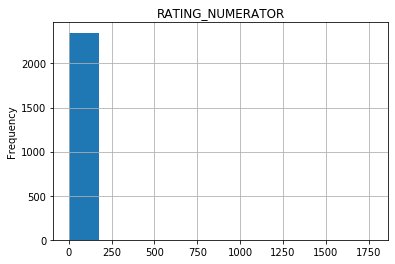

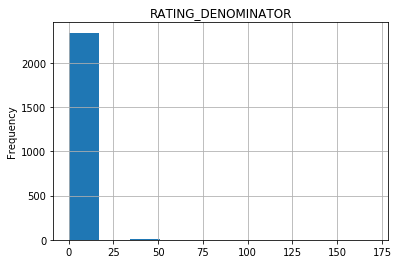

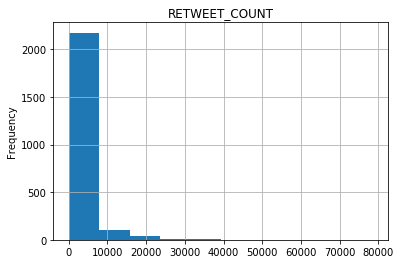

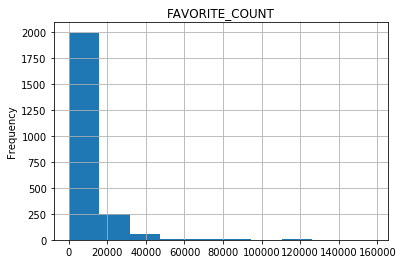

In [349]:
hist_list = ['rating_numerator','rating_denominator','retweet_count','favorite_count']

for x in hist_list:
        if df_combined[x].dtype != 'O':
            df_combined[x].hist();
            plt.title(str(x).upper())
            plt.ylabel('Frequency')
            plt.show()
            plt.clf

In [350]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 892420643555336193 to 666020888022790149
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   in_reply_to_status_id       78 non-null     float64            
 1   in_reply_to_user_id         78 non-null     float64            
 2   timestamp                   2356 non-null   datetime64[ns, UTC]
 3   source                      2356 non-null   object             
 4   text                        2356 non-null   object             
 5   retweeted_status_id         181 non-null    float64            
 6   retweeted_status_user_id    181 non-null    float64            
 7   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 8   expanded_urls               2297 non-null   object             
 9   rating_numerator            2356 non-null   int64              
 10  rating_denominator          2

Last but not least, it was checked for duplicates. Since tweet id should be unique it isn't sufficient to check for duplicate rows.

In [351]:
df_combined.index.duplicated().sum()

0

##### II. E.) Data Problems

During data gathering and inspection following problems were detected:

1. Dates are formatted as strings instead of datetime objects (Note: this is already fixed by the time reading by "parse_dates" in the "pd.read_csv"-command)
2. in_reply_to_status_id and in_reply_to_user_id are formatted as floats instead of strings
3. image_width, image_height, retweet_count, favorite_count, user_followers_count and user_favourites_count are formatted as floats instead of integers
4. source columns contains full HTML tags
5. doggo, floofer, pupper and puppo dont contain any information
6. rating numerator and rating denominator reflect one information
7. expanded_urls_add is less than expanded_urls
8. there are duplicate columns: text, expanded_urls, source, in_reply_to_status_id, in_reply_to_user_id

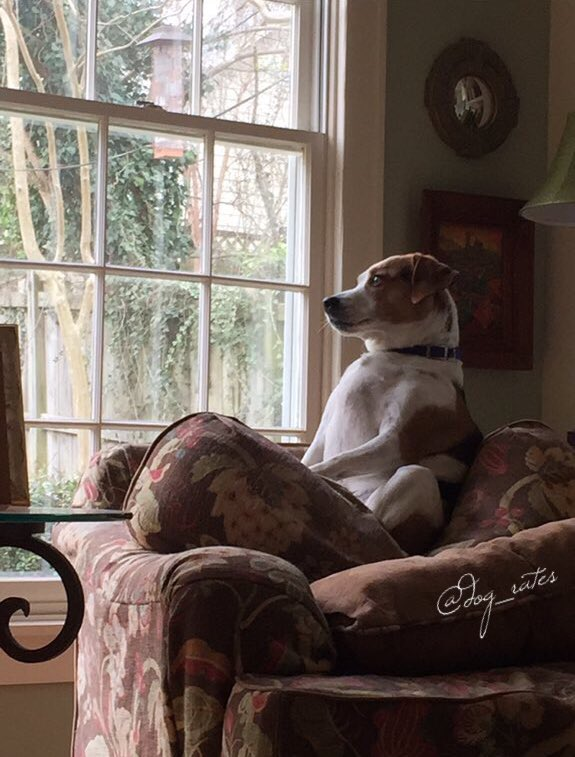

In [352]:
random_dog = random.choice(df_combined[df_combined.expanded_urls_add.notnull()].expanded_urls_add.values)
Image(url=random_dog, embed=True, width=260, height=260)

<a id='wrangling'></a>
## III. - Data Wrangling

This chapter aims at solving the issues raised above. Since dates are formatted correctly by now in_reply_to_status_id and in_reply_to_user_id were treated next.

##### III. A.) Format floats to strings e.g. in_reply_to_status_id and in_reply_to_user_id

Columns like "in_reply_to_status_id" or "in_reply_to_user_id" are numbers but since these columns are identifiers they cannot be used for calculation. A sum of ID's is not informative at all.

In [353]:
convert_strings = ['in_reply_to_status_id','in_reply_to_user_id','in_reply_to_status_id_add','in_reply_to_user_id_add','retweeted_status_id','retweeted_status_user_id']

for x in convert_strings:
    df_combined[x] =  df_combined[x].apply(lambda y: str(y))

In [354]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 892420643555336193 to 666020888022790149
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   in_reply_to_status_id       2356 non-null   object             
 1   in_reply_to_user_id         2356 non-null   object             
 2   timestamp                   2356 non-null   datetime64[ns, UTC]
 3   source                      2356 non-null   object             
 4   text                        2356 non-null   object             
 5   retweeted_status_id         2356 non-null   object             
 6   retweeted_status_user_id    2356 non-null   object             
 7   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 8   expanded_urls               2297 non-null   object             
 9   rating_numerator            2356 non-null   int64              
 10  rating_denominator          2

##### III. B.) Format floats to ints e.g. image_width and image_height

These columns are clearly numeric values that could be used for calcultion. Even though we don' sum "image_width" and "image_height", in some cases it might be usefull to re-scale them or cap these values to fit a specific aspect ratio.

In [355]:
convert_ints = ['image_width','image_height','retweet_count','favorite_count','user_followers_count','user_favourites_count']

for x in convert_ints:
    # Minimum values for columns with missings are greater than 0. Thus we transform NA's to 0
    df_combined[x] =  df_combined[x].fillna(0)
    df_combined[x] =  df_combined[x].apply(lambda y: int(y))

In [356]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 892420643555336193 to 666020888022790149
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   in_reply_to_status_id       2356 non-null   object             
 1   in_reply_to_user_id         2356 non-null   object             
 2   timestamp                   2356 non-null   datetime64[ns, UTC]
 3   source                      2356 non-null   object             
 4   text                        2356 non-null   object             
 5   retweeted_status_id         2356 non-null   object             
 6   retweeted_status_user_id    2356 non-null   object             
 7   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 8   expanded_urls               2297 non-null   object             
 9   rating_numerator            2356 non-null   int64              
 10  rating_denominator          2

##### III. C.) Source columns contains full HTML tags

Since this column contains full HTML tags, it was decided to split the string by bracktes. Thus, we receive the information between the HTML tags.

In [357]:
df_combined['source'] =  df_combined['source'].apply(lambda y: y.split('>')[1].split('<')[0])

In [358]:
df_combined['source'].unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene',
       'TweetDeck'], dtype=object)

##### III. D.) Doggo, Floofer, Pupper and Puppo

As mentioned in the very beginning, doggo, floofer, pupper and puppo are slang terms for dogs. A dog is mapped to the respective category by age. Hence, the true information in all four columns is the same - age. However, WeRateDogs® uses the term floofer for furry dogs.

Thus we combine the information doggo and pupper/puppo in a new categorical column called age. Floofer is converted into a boolean variable, reflecting the information wether a dog is furry by either yes or no.

In [359]:
df_combined['furry'] = df_combined['floofer']=='floofer'
df_combined['furry'].sum()

10

Before merging pupper and puppo it was checked that both columns dont overlap. Since there is no overlap both columns contain information for diffrent tweets. Thus, merging both columns is easily possible.

In [360]:
(df_combined[df_combined['pupper']=='pupper'].puppo != 'None').sum() == (df_combined[df_combined['puppo']=='puppo'].pupper != 'None').sum() == 0

True

In [361]:
df_combined['age'] = 'Unknown'
age_list = ['pupper','puppo','doggo']

for x in age_list:
    if x == 'doggo':
        df_combined.loc[df_combined[x]==x, 'age'] = 'Adult'
    else:
        df_combined.loc[df_combined[x]==x, 'age'] = 'Child'

df_combined['age'].value_counts()

Unknown    1985
Child       274
Adult        97
Name: age, dtype: int64

In [362]:
df_combined[df_combined['age']=='Unknown'].text.values

array(["This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
       "This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",
       'This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB',
       ...,
       'Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR',
       'This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI',
       'Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj'],
      dtype=object)

Numbers suggest that there are only 10 floofers in the sample. A quick look at the texts revealed that the columns floofer, doggo, pupper and puppo are just taken from the text. A short example: In case the text contains the word "pupper" then the column pupper is filled with "pupper". This is problematic for two reasons! First, in case the text contains "pupper" or "puppo" a puppy is not identified as puppy. Second, the text colums often contain diffrent informations, which makes sense because tweets shoudn't look the same. 

However, this undermines the trustworthiness of text analysis. As can be seen, the informations contained in the text coulmn are diffrent across tweets.

Hence,features are kept but original columns were dropped, since the information is barely useable.

In [363]:
df_combined.drop(['doggo','pupper','puppo','floofer'], axis=1, inplace=True)

##### III. D.) Rating numerator and Rating denominator reflect one information

The final dog ratings consist of two elements a numerator and a denominator. Since the denominator can change it would be misleading to compare dogs based on the numerator. In case of a constant denominator there is no diffrence between the final rating and the numerator, since the rank ordering would be the same.

Hence, the rating is calculated in the next step. Before calculation, rating denominators were floored at 1 to prevent division by 0. 

In [364]:
df_combined.loc[df_combined['rating_denominator']==0, 'rating_denominator'] = 1
(df_combined['rating_denominator']==0).sum()

0

In [365]:
df_combined['rating'] = df_combined['rating_numerator'] / df_combined['rating_denominator']

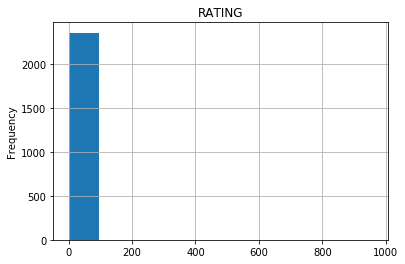

In [366]:
df_combined['rating'].hist()
plt.title(str('rating').upper())
plt.ylabel('Frequency')
plt.show()
plt.clf;

In [367]:
len(df_combined[df_combined['rating']>df_combined['rating'].quantile(0.99)])

14

The histogramm above is biased due to 14 outliers with a rating greater than the 99% confidence intervall. Thus, values were capped at the 99% confidence intervall.

In [368]:
df_combined.loc[df_combined['rating']>df_combined['rating'].quantile(0.99), 'rating'] = df_combined['rating'].quantile(0.99)

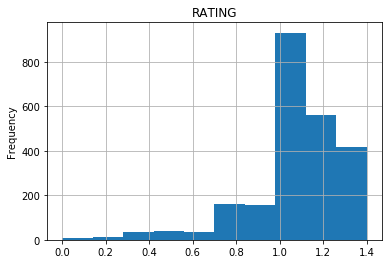

In [369]:
df_combined['rating'].hist()
plt.title(str('rating').upper())
plt.ylabel('Frequency')
plt.show()
plt.clf;

In [370]:
df_combined.drop(['rating_numerator','rating_denominator'], axis=1, inplace=True)

##### III. E.) Expanded_urls_add is less than expanded_urls

Next, it was checked why expanded_urls (59) column contains less missings than expanded_urls_add (297 missings). Please keep in mind, that missing URL's are mostly replies or retweets, which means the URL is not truly missing i.e. there are 3 missing URL's in expanded_urls.

In [371]:
# For this we take the missing expanded_urls_add and look for the expanded_urls column
df_combined[df_combined['expanded_urls_add'].isna()].expanded_urls

tweet_id
888202515573088257    https://twitter.com/dog_rates/status/887473957...
886267009285017600                                                  NaN
886054160059072513    https://twitter.com/dog_rates/status/886053434...
885518971528720385    https://twitter.com/4bonds2carbon/status/88551...
884247878851493888    https://twitter.com/kaijohnson_19/status/88396...
                                            ...                        
671550332464455680                                                  NaN
669684865554620416                                                  NaN
668967877119254528                                                  NaN
668587383441514497                        https://vine.co/v/ea0OwvPTx9l
667070482143944705                                                  NaN
Name: expanded_urls, Length: 297, dtype: object

There clearly is a data discrepancy between the datasets but there is no obvious pattern why some URL'S are missing in expanded_urls_add. Even a change of gathered URL source doenst change the number of missings.

This questions the validity of the combined dataset and further investigation is necessary to see if both datasets can be combined. Therefore, other columns e.g. text is used to identify additional diffrences.

In [372]:
# Take all observations with missing expanded_urls_add and look at their expanded_urls
df_combined[df_combined['expanded_urls_add'].isna()].expanded_urls

tweet_id
888202515573088257    https://twitter.com/dog_rates/status/887473957...
886267009285017600                                                  NaN
886054160059072513    https://twitter.com/dog_rates/status/886053434...
885518971528720385    https://twitter.com/4bonds2carbon/status/88551...
884247878851493888    https://twitter.com/kaijohnson_19/status/88396...
                                            ...                        
671550332464455680                                                  NaN
669684865554620416                                                  NaN
668967877119254528                                                  NaN
668587383441514497                        https://vine.co/v/ea0OwvPTx9l
667070482143944705                                                  NaN
Name: expanded_urls, Length: 297, dtype: object

In [377]:
# There is a mismatch in texts for 25 observations
(df_combined['text'] != df_combined['text_add']).sum()

25

In [375]:
# In case of any mismatch .min() would evaluate to 0 (False)
(df_combined[df_combined['text'] != df_combined['text_add']].index ==  df_errors['id']).min()

True

**Fortunately, the data discrepancy in texts could be explained by the errors. This emphasizes the validity of our combined dataset.**

Since, URL's are optional and other columns match perfectly, there is no further analysis on URL discrepancy. Nevertheless, the column expanded_urls_add is necesarry to display images.

##### III. F.) There are duplicate columns

Last but not least duplicate columns, which were used for data quality checks got dropped.

In [378]:
df_combined.drop(['text_add','source_add','in_reply_to_status_id_add','in_reply_to_user_id_add'], axis=1, inplace=True)

In [379]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 892420643555336193 to 666020888022790149
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   in_reply_to_status_id       2356 non-null   object             
 1   in_reply_to_user_id         2356 non-null   object             
 2   timestamp                   2356 non-null   datetime64[ns, UTC]
 3   source                      2356 non-null   object             
 4   text                        2356 non-null   object             
 5   retweeted_status_id         2356 non-null   object             
 6   retweeted_status_user_id    2356 non-null   object             
 7   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 8   expanded_urls               2297 non-null   object             
 9   name                        2356 non-null   object             
 10  image_width                 2

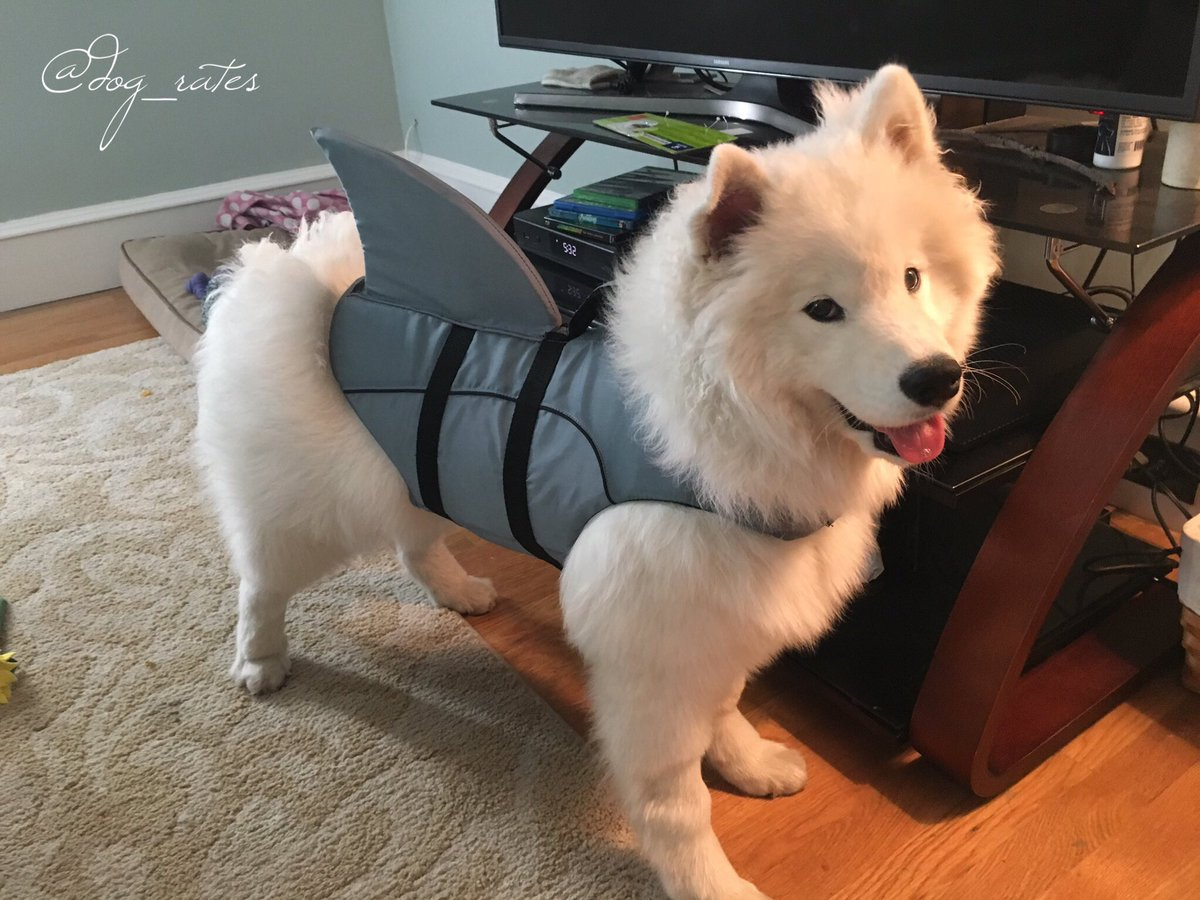

In [340]:
random_dog = random.choice(df_combined[df_combined.expanded_urls_add.notnull()].expanded_urls_add.values)
Image(url=random_dog, embed=True, width=260, height=260)

<a id='eda'></a>
## IV. - Explanatory Analysis

spaceholder

<a id='conclusions'></a>
## V. - Conclusions

spaceholder

<a id='references'></a>
## V. - References


- [Writing to a JSOn file](https://stackabuse.com/reading-and-writing-json-to-a-file-in-python/)


- [Tweepy Error Messages](https://www.programcreek.com/python/example/13279/tweepy.TweepError)


- [Flatten Nested JSON files](https://towardsdatascience.com/how-to-flatten-deeply-nested-json-objects-in-non-recursive-elegant-python-55f96533103d)

<a id='appendix'></a>
## VII. - Appendix